In [1]:
# Original Jupyter Notebook by David Koes

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
exhaustiveness = 8

In [5]:
flfname = f'../data/crossdocking-flex/cd-carlos-CNNrescore-e{exhaustiveness}-d3.5-LIG.csv'

flexlig = pd.read_csv(flfname).rename(columns={"rmsd": "rmsd_lig", "molids": "molids_lig"}).drop(columns="tag")
flexlig.pocket = flexlig.pocket.str.replace("/PDB_Structures/", "").str.strip() # Remove path from pocket name
flexlig

molids_lig  rmsd_lig  cnnscore  cnnaffinity  \
0      3EML_ZMA_A_401:3EML_ZMA_A_401   6.98059  0.842898     7.073944   
1      3EML_ZMA_A_401:3EML_ZMA_A_401   7.21039  0.833297     0.357896   
2      3EML_ZMA_A_401:3EML_ZMA_A_401   9.08965  0.782344     7.130491   
3      3EML_ZMA_A_401:3EML_ZMA_A_401   9.29061  0.762929     0.198129   
4      3EML_ZMA_A_401:3EML_ZMA_A_401   6.13753  0.748435     6.971288   
...                              ...       ...       ...          ...   
81277  5C7A_4YE_A_402:5C7A_4YE_A_402  10.32820  0.529529     0.581109   
81278  5C7A_4YE_A_402:5C7A_4YE_A_402  10.34450  0.529444     4.382333   
81279  5C7A_4YE_A_402:5C7A_4YE_A_402  17.66560  0.486497     0.470185   
81280  5C7A_4YE_A_402:5C7A_4YE_A_402   8.90836  0.465802     4.023231   
81281  5C7A_4YE_A_402:5C7A_4YE_A_402  17.65040  0.462651     0.569908   

       minimizedAffinity pocket   rec   lig  
0              -10.30702  AA2AR  3QAK  3EML  
1              -10.99423  AA2AR  3QAK  3EML  
2               -9.69798  AA2AR  3QAK  3EML  
3               -9.99973  AA2AR  3QAK  3EML  
4              -10.31872  AA2AR  3QAK  3EML  
...                  ...    ...   ...   ...  
81277           -5.59953   XIAP  3G76  5C7A  
81278           -6.96083   XIAP  3G76  5C7A  
81279           -6.47080   XIAP  3G76  5C7A  
81280           -6.71381   XIAP  3G76  5C7A  
81281           -6.50689   XIAP  3G76  5C7A  

[81282 rows x 8 columns]

In [6]:
frfname = f'../data/crossdocking-flex/cd-carlos-CNNrescore-e{exhaustiveness}-d3.5-FLEX.csv'

# This contains side chain RMSD between input (target) and output (pose)
flexrec = pd.read_csv(frfname).rename(columns={"rmsd": "target-pose_rmsd", "molids": "molids_rec"}).drop(columns="tag")
flexrec.pocket = flexrec.pocket.str.replace("/PDB_Structures/", "").str.strip() # Remove path from pocket name

flexrec

molids_rec  target-pose_rmsd  \
0      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.38707   
1      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.52698   
2      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.41695   
3      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.60430   
4      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.41815   
...                                                  ...               ...   
81007  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.85098   
81008  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           2.25624   
81009  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           2.17718   
81010  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.28246   
81011  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.67127   

      pocket   rec   lig  
0      AA2AR  3QAK  3EML  
1      AA2AR  3QAK  3EML  
2      AA2AR  3QAK  3EML  
3      AA2AR  3QAK  3EML  
4      AA2AR  3QAK  3EML  
...      ...   ...   ...  
81007   XIAP  3G76  5C7A  
81008   XIAP  3G76  5C7A  
81009   XIAP  3G76  5C7A  
81010   XIAP  3G76  5C7A  
81011   XIAP  3G76  5C7A  

[81012 rows x 5 columns]

In [7]:
# Load data for rigid docking
# Data from Paul
rigid= pd.read_csv('../data/crossdocking-flex/final_def_ensemble_rescore_defaults.csv')
rigid.rec = rigid.rec.str.slice(-4).str.strip() # Remove path from rec name
rigid.pocket = rigid.pocket.str.replace("/PDB_Structures/", "").str.strip() # Remove path from pocket name

rigid

tag                           molids      rmsd  cnnscore  \
0      defaults  3QAK_UKA_A_1200:3QAK_UKA_A_1200  12.11020  0.301147   
1      defaults  3QAK_UKA_A_1200:3QAK_UKA_A_1200  12.50650  0.208695   
2      defaults  3QAK_UKA_A_1200:3QAK_UKA_A_1200  13.18390  0.184682   
3      defaults  3QAK_UKA_A_1200:3QAK_UKA_A_1200  12.54770  0.182141   
4      defaults  3QAK_UKA_A_1200:3QAK_UKA_A_1200  10.77710  0.176975   
...         ...                              ...       ...       ...   
73154  defaults    5C3K_4XF_A_402:5C3K_4XF_A_402   5.74781  0.634539   
73155  defaults    5C3K_4XF_A_402:5C3K_4XF_A_402   5.43635  0.619502   
73156  defaults    5C3K_4XF_A_402:5C3K_4XF_A_402   8.00052  0.591508   
73157  defaults    5C3K_4XF_A_402:5C3K_4XF_A_402  10.20340  0.567792   
73158  defaults    5C3K_4XF_A_402:5C3K_4XF_A_402   9.24777  0.519345   

       cnnaffinity  minimizedAffinity pocket   rec   lig  
0         7.290389          -10.66544  AA2AR  3EML  3QAK  
1         0.537906           -9.09964  AA2AR  3EML  3QAK  
2         6.905550          -10.15615  AA2AR  3EML  3QAK  
3         0.102756           -8.79749  AA2AR  3EML  3QAK  
4         6.870663          -10.63542  AA2AR  3EML  3QAK  
...            ...                ...    ...   ...   ...  
73154     3.836325           -5.31584   XIAP  3G76  5C3K  
73155     0.129123           -5.06683   XIAP  3G76  5C3K  
73156     3.458242           -4.41025   XIAP  3G76  5C3K  
73157     0.314778           -5.61288   XIAP  3G76  5C3K  
73158     3.484066           -5.22737   XIAP  3G76  5C3K  

[73159 rows x 9 columns]

`flexlig` and `flexrec` have a different number of rows. This is likely due to systems were no flexible residues were identified. This can be caused by problematic systems. In order to find such systems, the overlap between `rigid` and `flexlig` and `flexrec` can be computed after removing problematic systems.

In [8]:
# Filter out problematic systems from Paul's analysis

#with open("../data/crossdocking-flex/mw_and_visual_filter_removal.txt") as f:
#    lines = f.readlines()

#to_remove = {"lig": [line.strip().split("/")[-1] for line in lines], "pocket": [line.strip().split("/")[1] for line in lines]}
#df_to_remove = pd.DataFrame(to_remove)
#assert len(df_to_remove) == 49
#print(df_to_remove)

#for _, row in df_to_remove.iterrows():
#    rigid = rigid[~((rigid.lig == row.lig) & (rigid.pocket == row.pocket))]
#    flexlig = flexlig[~((flexlig.lig == row.lig) & (flexlig.pocket == row.pocket))]
#    flexrec = flexrec[~((flexrec.lig == row.lig) & (flexrec.pocket == row.pocket))]

In [9]:
pocketdiff = pd.read_csv("../data/crossdocking-flex/pocketdiff.csv", index_col=0)
assert len(pocketdiff) == 7966
print(pocketdiff)

       rec   lig  pocket_change  backbone_change
0     3EML  3QAK       2.114589         1.665561
1     3QAK  3EML       1.609607         1.012212
2     2E2B  2G2H       2.992638         1.797033
3     2E2B  3KFA       1.190571         0.608727
4     2E2B  1M52       2.160562         1.740031
...    ...   ...            ...              ...
7961  3G76  5C7D       0.981363         0.733994
7962  3G76  5C7A       1.095492         0.806999
7963  3G76  3HL5       0.907245         0.369391
7964  3G76  4KMP       1.018672         0.417608
7965  3G76  5C3K       0.679859         0.480125

[7966 rows x 4 columns]


In [10]:
# Use ligands in POCKETDIFF to filter out unwanted ligands from before
to_keep = pocketdiff[["lig", "rec"]]

# Keep only keys found in to_keep
rigid = pd.merge(rigid, to_keep, how="right", on=["lig", "rec"])
flexlig = pd.merge(flexlig, to_keep, how="right", on=["lig", "rec"])
flexrec = pd.merge(flexrec, to_keep, how="right", on=["lig", "rec"])

print(rigid.isnull().any().any(), flexlig.isnull().any().any())

assert not rigid.isnull().any().any()

print(flexrec.isnull().any())

# Drop NaNs
# systems not found in to_keep
flexlig = flexlig.dropna()
flexrec = flexrec.dropna()

False False
molids_rec           True
target-pose_rmsd     True
pocket               True
rec                 False
lig                 False
dtype: bool


In [11]:
# Identify possible differences between rigid and flexible docking
rigidgen = ((p, l, r) for p, l, r in zip(rigid.pocket, rigid.lig, rigid.rec))
flexRgen = ((p, l, r) for p, l, r in zip(flexrec.pocket, flexrec.lig, flexrec.rec))
flexLgen = ((p, l, r) for p, l, r in zip(flexlig.pocket, flexlig.lig, flexlig.rec))

rigidset = set(rigidgen)
flexRset = set(flexRgen)
flexLset = set(flexLgen)

print(len(rigidset), len(flexRset), len(flexLset))
assert len(rigidset) == 7966
print(len(flexRset))
print(len(rigidset) - len(flexRset), len(rigidset) - len(flexLset))

print(rigidset - flexRset)
print(rigidset - flexLset)


flexfail = (rigidset - flexRset).union(rigidset - flexLset)
print(len(flexfail))
flexfail

7966 7941 7966
7941
25 0
{('IGF1R', '3NW7', '5FXR'), ('MK10', '3ELJ', '1UKI'), ('SRC', '5D10', '3UQG'), ('MK01', '5LCJ', '4GSB'), ('JAK2', '5CF6', '4F08'), ('ACES', '1ZGB', '1JJB'), ('MK10', '4L7F', '4HYS'), ('MK01', '4FV2', '4GSB'), ('IGF1R', '3NW6', '5FXR'), ('JAK2', '4E4M', '4F08'), ('MK10', '2G01', '1UKI'), ('ACES', '2CMF', '1JJB'), ('IGF1R', '3LVP', '5FXR'), ('SRC', '3DQX', '3UQG'), ('ACES', '1ACJ', '1JJB'), ('IGF1R', '2ZM3', '5FXR'), ('IGF1R', '2OJ9', '5FXR'), ('JAK2', '4D0W', '4F08'), ('CDK2', '3IG7', '3QQJ'), ('MK10', '3RTP', '1UKI'), ('MK01', '4ZZM', '4GSB'), ('MK01', '5NHV', '4GSB'), ('SRC', '5J5S', '3UQG'), ('HIVPR', '1HWR', '1PRO'), ('IGF1R', '1JQH', '5FXR')}
set()
25


{('ACES', '1ACJ', '1JJB'),
 ('ACES', '1ZGB', '1JJB'),
 ('ACES', '2CMF', '1JJB'),
 ('CDK2', '3IG7', '3QQJ'),
 ('HIVPR', '1HWR', '1PRO'),
 ('IGF1R', '1JQH', '5FXR'),
 ('IGF1R', '2OJ9', '5FXR'),
 ('IGF1R', '2ZM3', '5FXR'),
 ('IGF1R', '3LVP', '5FXR'),
 ('IGF1R', '3NW6', '5FXR'),
 ('IGF1R', '3NW7', '5FXR'),
 ('JAK2', '4D0W', '4F08'),
 ('JAK2', '4E4M', '4F08'),
 ('JAK2', '5CF6', '4F08'),
 ('MK01', '4FV2', '4GSB'),
 ('MK01', '4ZZM', '4GSB'),
 ('MK01', '5LCJ', '4GSB'),
 ('MK01', '5NHV', '4GSB'),
 ('MK10', '2G01', '1UKI'),
 ('MK10', '3ELJ', '1UKI'),
 ('MK10', '3RTP', '1UKI'),
 ('MK10', '4L7F', '4HYS'),
 ('SRC', '3DQX', '3UQG'),
 ('SRC', '5D10', '3UQG'),
 ('SRC', '5J5S', '3UQG')}

In [12]:
for p, l, r in flexfail:
    print(f"{p} & {r} & {l} & No flexible residues \\\\")

IGF1R & 5FXR & 3NW7 & No flexible residues \\
MK10 & 1UKI & 3ELJ & No flexible residues \\
JAK2 & 4F08 & 4E4M & No flexible residues \\
MK10 & 1UKI & 2G01 & No flexible residues \\
ACES & 1JJB & 2CMF & No flexible residues \\
IGF1R & 5FXR & 3LVP & No flexible residues \\
SRC & 3UQG & 3DQX & No flexible residues \\
ACES & 1JJB & 1ACJ & No flexible residues \\
IGF1R & 5FXR & 2ZM3 & No flexible residues \\
IGF1R & 5FXR & 2OJ9 & No flexible residues \\
SRC & 3UQG & 5D10 & No flexible residues \\
JAK2 & 4F08 & 4D0W & No flexible residues \\
CDK2 & 3QQJ & 3IG7 & No flexible residues \\
MK01 & 4GSB & 5LCJ & No flexible residues \\
MK10 & 1UKI & 3RTP & No flexible residues \\
JAK2 & 4F08 & 5CF6 & No flexible residues \\
MK01 & 4GSB & 4ZZM & No flexible residues \\
MK01 & 4GSB & 5NHV & No flexible residues \\
SRC & 3UQG & 5J5S & No flexible residues \\
ACES & 1JJB & 1ZGB & No flexible residues \\
MK10 & 4HYS & 4L7F & No flexible residues \\
HIVPR & 1PRO & 1HWR & No flexible residues \\
MK01 & 4

In [13]:
# Remove systems without flexible RMSD from both flexlig and rigid
failpockets = np.array(list(set(p for p, _, _ in flexfail)))
failligs = np.array(list(set(l for _, l, _ in flexfail)))
failrecs = np.array(list(set(r for _, _, r in flexfail)))

flexlig = flexlig[~(np.isin(flexlig.pocket.to_numpy(), failpockets) & np.isin(flexlig.lig.to_numpy(), failligs) & np.isin(flexlig.rec.to_numpy(), failrecs))]

rigid = rigid[~(np.isin(rigid.pocket.to_numpy(), failpockets) & np.isin(rigid.lig.to_numpy(), failligs) & np.isin(rigid.rec.to_numpy(), failrecs))]

assert len(flexlig) == len(flexrec)
print(len(flexlig), len(flexrec))

79372 79372


In [14]:
# Generate paths to GNINA log files for easy checks
for p, l, r in flexfail:
    print(f"carlos_cd/{p}/PDB_Structures/{l}_LIG_aligned-{r}_PRO-gnina.log \\")

carlos_cd/IGF1R/PDB_Structures/3NW7_LIG_aligned-5FXR_PRO-gnina.log \
carlos_cd/MK10/PDB_Structures/3ELJ_LIG_aligned-1UKI_PRO-gnina.log \
carlos_cd/JAK2/PDB_Structures/4E4M_LIG_aligned-4F08_PRO-gnina.log \
carlos_cd/MK10/PDB_Structures/2G01_LIG_aligned-1UKI_PRO-gnina.log \
carlos_cd/ACES/PDB_Structures/2CMF_LIG_aligned-1JJB_PRO-gnina.log \
carlos_cd/IGF1R/PDB_Structures/3LVP_LIG_aligned-5FXR_PRO-gnina.log \
carlos_cd/SRC/PDB_Structures/3DQX_LIG_aligned-3UQG_PRO-gnina.log \
carlos_cd/ACES/PDB_Structures/1ACJ_LIG_aligned-1JJB_PRO-gnina.log \
carlos_cd/IGF1R/PDB_Structures/2ZM3_LIG_aligned-5FXR_PRO-gnina.log \
carlos_cd/IGF1R/PDB_Structures/2OJ9_LIG_aligned-5FXR_PRO-gnina.log \
carlos_cd/SRC/PDB_Structures/5D10_LIG_aligned-3UQG_PRO-gnina.log \
carlos_cd/JAK2/PDB_Structures/4D0W_LIG_aligned-4F08_PRO-gnina.log \
carlos_cd/CDK2/PDB_Structures/3IG7_LIG_aligned-3QQJ_PRO-gnina.log \
carlos_cd/MK01/PDB_Structures/5LCJ_LIG_aligned-4GSB_PRO-gnina.log \
carlos_cd/MK10/PDB_Structures/3RTP_LIG_aligned

In [15]:
# Reindex flexlig as flexrec
# Otherwise concatenation will add NaNs where indices do not match
flexlig.reset_index(inplace=True, drop=True)
flexlig["pose"] = flexlig.groupby(["pocket", "lig", "rec"]).cumcount()
flexlig

molids_lig  rmsd_lig  cnnscore  cnnaffinity  \
0      3QAK_UKA_A_1200:3QAK_UKA_A_1200   7.61065  0.592328     8.179861   
1      3QAK_UKA_A_1200:3QAK_UKA_A_1200   6.36056  0.498482     0.093404   
2      3QAK_UKA_A_1200:3QAK_UKA_A_1200   6.50215  0.394936     7.910071   
3      3QAK_UKA_A_1200:3QAK_UKA_A_1200  11.18670  0.386876     0.363900   
4      3QAK_UKA_A_1200:3QAK_UKA_A_1200   2.51549  0.382015     7.980559   
...                                ...       ...       ...          ...   
79367    5C3K_4XF_A_402:5C3K_4XF_A_402  10.70780  0.751864     0.308074   
79368    5C3K_4XF_A_402:5C3K_4XF_A_402  11.89720  0.713376     3.989370   
79369    5C3K_4XF_A_402:5C3K_4XF_A_402   9.55462  0.703115     0.220847   
79370    5C3K_4XF_A_402:5C3K_4XF_A_402  13.38510  0.651406     4.060548   
79371    5C3K_4XF_A_402:5C3K_4XF_A_402  12.76100  0.650551     0.195244   

       minimizedAffinity pocket   rec   lig  pose  
0              -12.93476  AA2AR  3EML  3QAK     0  
1              -11.67325  AA2AR  3EML  3QAK     1  
2              -12.17950  AA2AR  3EML  3QAK     2  
3              -12.54085  AA2AR  3EML  3QAK     3  
4              -12.21410  AA2AR  3EML  3QAK     4  
...                  ...    ...   ...   ...   ...  
79367           -6.87362   XIAP  3G76  5C3K     5  
79368           -6.56364   XIAP  3G76  5C3K     6  
79369           -6.90788   XIAP  3G76  5C3K     7  
79370           -6.16575   XIAP  3G76  5C3K     8  
79371           -5.96928   XIAP  3G76  5C3K     9  

[79372 rows x 9 columns]

In [16]:
flexrec.reset_index(inplace=True, drop=True)
flexrec["pose"] = flexrec.groupby(["pocket", "lig", "rec"]).cumcount()
flexrec

molids_rec  target-pose_rmsd  \
0      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.52446   
1      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.38698   
2      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.49297   
3      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           2.06535   
4      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           2.09211   
...                                                  ...               ...   
79367  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           2.20678   
79368  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.56224   
79369  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.58770   
79370  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.94670   
79371  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           2.06877   

      pocket   rec   lig  pose  
0      AA2AR  3EML  3QAK     0  
1      AA2AR  3EML  3QAK     1  
2      AA2AR  3EML  3QAK     2  
3      AA2AR  3EML  3QAK     3  
4      AA2AR  3EML  3QAK     4  
...      ...   ...   ...   ...  
79367   XIAP  3G76  5C3K     5  
79368   XIAP  3G76  5C3K     6  
79369   XIAP  3G76  5C3K     7  
79370   XIAP  3G76  5C3K     8  
79371   XIAP  3G76  5C3K     9  

[79372 rows x 6 columns]

In [17]:
# Merge LIG and FLEX data into a single dataframe

flex = pd.merge(flexlig, flexrec, how="left", on=["pocket", "lig", "rec", "pose"], suffixes=['_lig','_rec'])

assert len(flex) == len(flexlig) == len(flexrec)

flex

molids_lig  rmsd_lig  cnnscore  cnnaffinity  \
0      3QAK_UKA_A_1200:3QAK_UKA_A_1200   7.61065  0.592328     8.179861   
1      3QAK_UKA_A_1200:3QAK_UKA_A_1200   6.36056  0.498482     0.093404   
2      3QAK_UKA_A_1200:3QAK_UKA_A_1200   6.50215  0.394936     7.910071   
3      3QAK_UKA_A_1200:3QAK_UKA_A_1200  11.18670  0.386876     0.363900   
4      3QAK_UKA_A_1200:3QAK_UKA_A_1200   2.51549  0.382015     7.980559   
...                                ...       ...       ...          ...   
79367    5C3K_4XF_A_402:5C3K_4XF_A_402  10.70780  0.751864     0.308074   
79368    5C3K_4XF_A_402:5C3K_4XF_A_402  11.89720  0.713376     3.989370   
79369    5C3K_4XF_A_402:5C3K_4XF_A_402   9.55462  0.703115     0.220847   
79370    5C3K_4XF_A_402:5C3K_4XF_A_402  13.38510  0.651406     4.060548   
79371    5C3K_4XF_A_402:5C3K_4XF_A_402  12.76100  0.650551     0.195244   

       minimizedAffinity pocket   rec   lig  pose  \
0              -12.93476  AA2AR  3EML  3QAK     0   
1              -11.67325  AA2AR  3EML  3QAK     1   
2              -12.17950  AA2AR  3EML  3QAK     2   
3              -12.54085  AA2AR  3EML  3QAK     3   
4              -12.21410  AA2AR  3EML  3QAK     4   
...                  ...    ...   ...   ...   ...   
79367           -6.87362   XIAP  3G76  5C3K     5   
79368           -6.56364   XIAP  3G76  5C3K     6   
79369           -6.90788   XIAP  3G76  5C3K     7   
79370           -6.16575   XIAP  3G76  5C3K     8   
79371           -5.96928   XIAP  3G76  5C3K     9   

                                              molids_rec  target-pose_rmsd  
0      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.52446  
1      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.38698  
2      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.49297  
3      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           2.06535  
4      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           2.09211  
...                                                  ...               ...  
79367  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           2.20678  
79368  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.56224  
79369  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.58770  
79370  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.94670  
79371  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           2.06877  

[79372 rows x 11 columns]

In [18]:
flex = pd.merge(flex, pocketdiff, on=["rec", "lig"]).rename(columns={"pocket_change": "target-cognate_rmsd"}).drop(columns="backbone_change")
assert len(flex) == len(flexlig) == len(flexrec)
flex

molids_lig  rmsd_lig  cnnscore  cnnaffinity  \
0      3QAK_UKA_A_1200:3QAK_UKA_A_1200   7.61065  0.592328     8.179861   
1      3QAK_UKA_A_1200:3QAK_UKA_A_1200   6.36056  0.498482     0.093404   
2      3QAK_UKA_A_1200:3QAK_UKA_A_1200   6.50215  0.394936     7.910071   
3      3QAK_UKA_A_1200:3QAK_UKA_A_1200  11.18670  0.386876     0.363900   
4      3QAK_UKA_A_1200:3QAK_UKA_A_1200   2.51549  0.382015     7.980559   
...                                ...       ...       ...          ...   
79367    5C3K_4XF_A_402:5C3K_4XF_A_402  10.70780  0.751864     0.308074   
79368    5C3K_4XF_A_402:5C3K_4XF_A_402  11.89720  0.713376     3.989370   
79369    5C3K_4XF_A_402:5C3K_4XF_A_402   9.55462  0.703115     0.220847   
79370    5C3K_4XF_A_402:5C3K_4XF_A_402  13.38510  0.651406     4.060548   
79371    5C3K_4XF_A_402:5C3K_4XF_A_402  12.76100  0.650551     0.195244   

       minimizedAffinity pocket   rec   lig  pose  \
0              -12.93476  AA2AR  3EML  3QAK     0   
1              -11.67325  AA2AR  3EML  3QAK     1   
2              -12.17950  AA2AR  3EML  3QAK     2   
3              -12.54085  AA2AR  3EML  3QAK     3   
4              -12.21410  AA2AR  3EML  3QAK     4   
...                  ...    ...   ...   ...   ...   
79367           -6.87362   XIAP  3G76  5C3K     5   
79368           -6.56364   XIAP  3G76  5C3K     6   
79369           -6.90788   XIAP  3G76  5C3K     7   
79370           -6.16575   XIAP  3G76  5C3K     8   
79371           -5.96928   XIAP  3G76  5C3K     9   

                                              molids_rec  target-pose_rmsd  \
0      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.52446   
1      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.38698   
2      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.49297   
3      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           2.06535   
4      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           2.09211   
...                                                  ...               ...   
79367  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           2.20678   
79368  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.56224   
79369  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.58770   
79370  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.94670   
79371  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           2.06877   

       target-cognate_rmsd  
0                 2.114589  
1                 2.114589  
2                 2.114589  
3                 2.114589  
4                 2.114589  
...                    ...  
79367             0.679859  
79368             0.679859  
79369             0.679859  
79370             0.679859  
79371             0.679859  

[79372 rows x 12 columns]

In [19]:
# Add pose column to rigid results as well
rigid["pose"] = rigid.groupby(["pocket", "lig", "rec"]).cumcount()

In [20]:
bestrigid = rigid.loc[rigid.groupby(['rec','lig'])['cnnscore'].idxmax()]
bestrigid.rec = bestrigid.rec.str.slice(-4) # Remove path from rec name
bestrigid.pocket = bestrigid.pocket.str.replace("/PDB_Structures/", "") # Remove path from pocket name

assert (bestrigid.pose == 0).all() # Check cumcount worked as expected

bestrigid

tag                           molids     rmsd  cnnscore  \
66982  defaults  2BM2_PM2_A_3211:2BM2_PM2_A_3211  8.33442  0.817750   
67027  defaults    2FS8_C3A_A_999:2FS8_C3A_A_999  5.85429  0.653781   
67036  defaults    2FS9_C4A_A_999:2FS9_C4A_A_999  7.00359  0.860233   
67000  defaults    2FWW_C1R_A_999:2FWW_C1R_A_999  3.67590  0.815322   
66991  defaults    2GDD_5AM_A_999:2GDD_5AM_A_999  6.73602  0.746444   
...         ...                              ...      ...       ...   
58423  defaults    1GFZ_CFF_A_940:1GFZ_CFF_A_940  3.18050  0.972332   
58450  defaults    3BCR_AZZ_A_940:3BCR_AZZ_A_940  3.77919  0.866755   
58459  defaults    3BD7_CKB_A_940:3BD7_CKB_A_940  3.50473  0.770555   
58432  defaults    3BDA_C4B_A_940:3BDA_C4B_A_940  5.39942  0.782247   
58441  defaults    3EBO_57D_A_940:3EBO_57D_A_940  5.99665  0.895032   

       cnnaffinity  minimizedAffinity pocket   rec   lig  pose  
66982     6.368227           -7.80791  TRYB1  1A0L  2BM2     0  
67027     6.623601           -7.45945  TRYB1  1A0L  2FS8     0  
67036     6.747996           -7.69461  TRYB1  1A0L  2FS9     0  
67000     4.276328           -3.64784  TRYB1  1A0L  2FWW     0  
66991     6.630740           -7.65218  TRYB1  1A0L  2GDD     0  
...            ...                ...    ...   ...   ...   ...  
58423     4.049852           -5.71322   PYGM  8GPB  1GFZ     0  
58450     5.027512           -7.60498   PYGM  8GPB  3BCR     0  
58459     3.740147           -5.91701   PYGM  8GPB  3BD7     0  
58432     3.579218           -6.26254   PYGM  8GPB  3BDA     0  
58441     4.895157           -7.62412   PYGM  8GPB  3EBO     0  

[7941 rows x 10 columns]

In [21]:
bestflex = flex.loc[flex.groupby(['rec','lig'])['cnnscore'].idxmax()]

assert (bestflex.pose == 0).all() # Check cumcount worked as expected

bestflex

molids_lig  rmsd_lig  cnnscore  cnnaffinity  \
74166  2BM2_PM2_A_3211:2BM2_PM2_A_3211   9.97324  0.844044     6.477723   
74216    2FS8_C3A_A_999:2FS8_C3A_A_999   5.96008  0.710734     7.047270   
74226    2FS9_C4A_A_999:2FS9_C4A_A_999   6.09921  0.716898     6.308069   
74186    2FWW_C1R_A_999:2FWW_C1R_A_999   1.47165  0.934818     4.889133   
74176    2GDD_5AM_A_999:2GDD_5AM_A_999   7.32848  0.865685     7.190760   
...                                ...       ...       ...          ...   
64698    1GFZ_CFF_A_940:1GFZ_CFF_A_940   3.77464  0.943478     4.039353   
64728    3BCR_AZZ_A_940:3BCR_AZZ_A_940   4.71739  0.768314     5.049916   
64738    3BD7_CKB_A_940:3BD7_CKB_A_940   5.51334  0.861324     4.201993   
64708    3BDA_C4B_A_940:3BDA_C4B_A_940   4.75390  0.510179     3.681571   
64718    3EBO_57D_A_940:3EBO_57D_A_940   6.12338  0.840518     4.834943   

       minimizedAffinity pocket   rec   lig  pose  \
74166           -8.24964  TRYB1  1A0L  2BM2     0   
74216           -8.51859  TRYB1  1A0L  2FS8     0   
74226           -6.77750  TRYB1  1A0L  2FS9     0   
74186           -4.90269  TRYB1  1A0L  2FWW     0   
74176           -7.46226  TRYB1  1A0L  2GDD     0   
...                  ...    ...   ...   ...   ...   
64698           -6.61969   PYGM  8GPB  1GFZ     0   
64728           -8.20208   PYGM  8GPB  3BCR     0   
64738           -9.08778   PYGM  8GPB  3BD7     0   
64708           -6.31240   PYGM  8GPB  3BDA     0   
64718           -8.80299   PYGM  8GPB  3EBO     0   

                                              molids_rec  target-pose_rmsd  \
74166  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.105340   
74216  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.209090   
74226  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.115250   
74186  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.166480   
74176  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.144200   
...                                                  ...               ...   
64698  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.745710   
64728  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.748123   
64738  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.756820   
64708  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          1.920210   
64718  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          1.604540   

       target-cognate_rmsd  
74166             0.599871  
74216             0.895928  
74226             0.863574  
74186             0.421804  
74176             0.973144  
...                    ...  
64698             0.532694  
64728             0.803541  
64738             0.968500  
64708             1.037797  
64718             0.996526  

[7941 rows x 12 columns]

In [22]:
assert len(bestrigid) == len(bestflex)

In [23]:
# Combine rigid and flexible docking results for analysis
combined = pd.merge(bestrigid, bestflex, how='inner', on=['rec','lig', "pocket", "pose"], suffixes=['_rigid','_flex'])

assert len(combined) == len(bestflex)

combined

tag                           molids     rmsd  cnnscore_rigid  \
0     defaults  2BM2_PM2_A_3211:2BM2_PM2_A_3211  8.33442        0.817750   
1     defaults    2FS8_C3A_A_999:2FS8_C3A_A_999  5.85429        0.653781   
2     defaults    2FS9_C4A_A_999:2FS9_C4A_A_999  7.00359        0.860233   
3     defaults    2FWW_C1R_A_999:2FWW_C1R_A_999  3.67590        0.815322   
4     defaults    2GDD_5AM_A_999:2GDD_5AM_A_999  6.73602        0.746444   
...        ...                              ...      ...             ...   
7936  defaults    1GFZ_CFF_A_940:1GFZ_CFF_A_940  3.18050        0.972332   
7937  defaults    3BCR_AZZ_A_940:3BCR_AZZ_A_940  3.77919        0.866755   
7938  defaults    3BD7_CKB_A_940:3BD7_CKB_A_940  3.50473        0.770555   
7939  defaults    3BDA_C4B_A_940:3BDA_C4B_A_940  5.39942        0.782247   
7940  defaults    3EBO_57D_A_940:3EBO_57D_A_940  5.99665        0.895032   

      cnnaffinity_rigid  minimizedAffinity_rigid pocket   rec   lig  pose  \
0              6.368227                 -7.80791  TRYB1  1A0L  2BM2     0   
1              6.623601                 -7.45945  TRYB1  1A0L  2FS8     0   
2              6.747996                 -7.69461  TRYB1  1A0L  2FS9     0   
3              4.276328                 -3.64784  TRYB1  1A0L  2FWW     0   
4              6.630740                 -7.65218  TRYB1  1A0L  2GDD     0   
...                 ...                      ...    ...   ...   ...   ...   
7936           4.049852                 -5.71322   PYGM  8GPB  1GFZ     0   
7937           5.027512                 -7.60498   PYGM  8GPB  3BCR     0   
7938           3.740147                 -5.91701   PYGM  8GPB  3BD7     0   
7939           3.579218                 -6.26254   PYGM  8GPB  3BDA     0   
7940           4.895157                 -7.62412   PYGM  8GPB  3EBO     0   

                           molids_lig  rmsd_lig  cnnscore_flex  \
0     2BM2_PM2_A_3211:2BM2_PM2_A_3211   9.97324       0.844044   
1       2FS8_C3A_A_999:2FS8_C3A_A_999   5.96008       0.710734   
2       2FS9_C4A_A_999:2FS9_C4A_A_999   6.09921       0.716898   
3       2FWW_C1R_A_999:2FWW_C1R_A_999   1.47165       0.934818   
4       2GDD_5AM_A_999:2GDD_5AM_A_999   7.32848       0.865685   
...                               ...       ...            ...   
7936    1GFZ_CFF_A_940:1GFZ_CFF_A_940   3.77464       0.943478   
7937    3BCR_AZZ_A_940:3BCR_AZZ_A_940   4.71739       0.768314   
7938    3BD7_CKB_A_940:3BD7_CKB_A_940   5.51334       0.861324   
7939    3BDA_C4B_A_940:3BDA_C4B_A_940   4.75390       0.510179   
7940    3EBO_57D_A_940:3EBO_57D_A_940   6.12338       0.840518   

      cnnaffinity_flex  minimizedAffinity_flex  \
0             6.477723                -8.24964   
1             7.047270                -8.51859   
2             6.308069                -6.77750   
3             4.889133                -4.90269   
4             7.190760                -7.46226   
...                ...                     ...   
7936          4.039353                -6.61969   
7937          5.049916                -8.20208   
7938          4.201993                -9.08778   
7939          3.681571                -6.31240   
7940          4.834943                -8.80299   

                                             molids_rec  target-pose_rmsd  \
0     cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.105340   
1     cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.209090   
2     cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.115250   
3     cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.166480   
4     cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.144200   
...                                                 ...               ...   
7936  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.745710   
7937  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.748123   
7938  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.756820   
7939  cd-

In [24]:
combined = combined.replace([np.inf, -np.inf], np.nan)

In [25]:
combined.rmsd.isnull().sum()

0

In [26]:
combined.rmsd_lig.isnull().sum()

0

In [27]:
combined["target-pose_rmsd"].isnull().sum()

9

In [28]:
combined.loc[combined["target-pose_rmsd"].isnull()][["pocket", "rec", "lig"]]

pocket   rec   lig
612    FA10  1IQE  2RA0
613    FA10  1IQE  3KQB
1201  CP2C9  1R9O  5W0C
3103   FA10  2XBV  2FZZ
3104   FA10  2XBV  2Y82
5877  KIF11  4BXN  1X88
5878  KIF11  4BXN  2IEH
5879  KIF11  4BXN  2X7D
5880  KIF11  4BXN  3K3B

Pocket FA10 contains a disulfide bond that is 

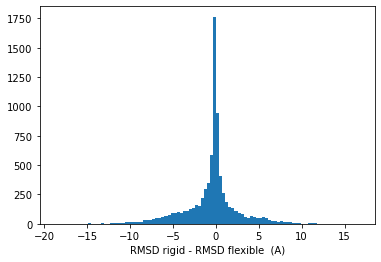

In [29]:
combined['rmsdiff'] = combined.rmsd - combined.rmsd_lig
plt.hist(combined.rmsdiff, bins=100);
plt.xlabel("RMSD rigid - RMSD flexible  (A)")
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-rmsd-diff_hist.pdf")

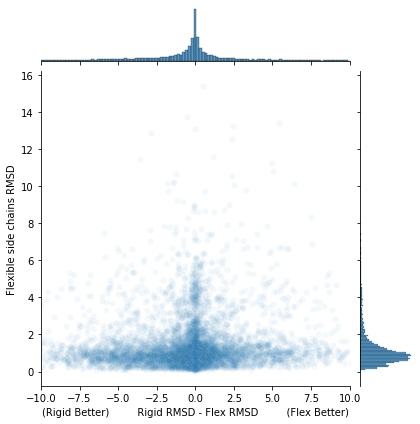

In [30]:
D = combined.dropna()

h = sns.jointplot(data=D, x='rmsdiff', y='target-cognate_rmsd', xlim=(-10,10), alpha=.05)
h.ax_joint.set_xlabel('(Rigid Better)         Rigid RMSD - Flex RMSD         (Flex Better)')
h.ax_joint.set_ylabel('Flexible side chains RMSD')
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-rmsd-diff_vs_side-chain-rmsd.pdf")

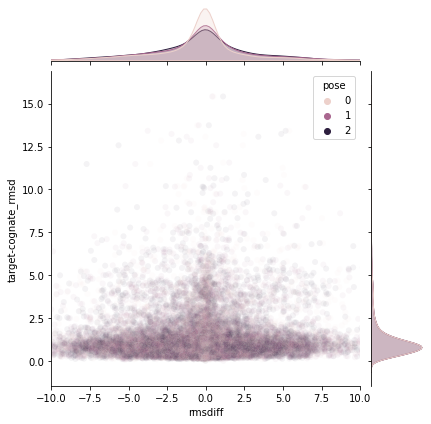

In [31]:
combinedall = pd.merge(rigid, flex, how='inner', on=['rec','lig', "pocket", "pose"], suffixes=['_rigid','_flex'])
combinedall['rmsdiff'] = combinedall.rmsd - combinedall.rmsd_lig
Dall = combinedall.dropna()
h = sns.jointplot(data=Dall[Dall.pose < 3], x='rmsdiff', y='target-cognate_rmsd', hue="pose", xlim=(-10,10), alpha=.05)

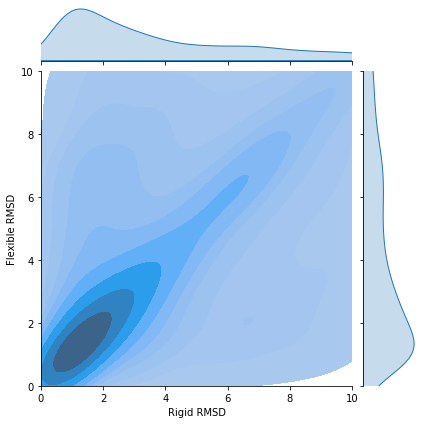

In [32]:
h = sns.jointplot(data=D, x='rmsd',y='rmsd_lig',kind='kde',ylim=(0,10), xlim=(0,10), fill=True)
h.ax_joint.set_xlabel('Rigid RMSD')
h.ax_joint.set_ylabel('Flexible RMSD')
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-rmsd-flex_vs_rmsd-rigid_corr.pdf")

In [33]:
stats.pearsonr(D.rmsd, D.rmsd_lig)

(0.639943898707291, 0.0)

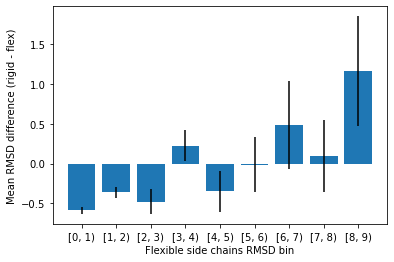

In [34]:
max_bin = 10
cuts = pd.cut(D["target-cognate_rmsd"], range(0,max_bin,1))
C = D.groupby([cuts])

fig, ax = plt.subplots()
ax.bar(list(range(1,max_bin,1)),C.mean().rmsdiff.to_numpy(), yerr=C.sem().rmsdiff)
ax.set_xlabel('Flexible side chains RMSD bin')
#ax.set_xticklabels(labels=[f"{i}-{i+1}" for i in range(0,10,1)])
ax.set_ylabel('Mean RMSD difference (rigid - flex)')
ax.set_xticks(range(1,max_bin))
ax.set_xticklabels([f"[{i}, {i+1})" for i in range(0,max_bin-1)])
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-mean-diff-rmsd_vs_flex-rmsd-bin_hist.pdf")

Text(0, 0.5, 'Mean RMSD difference (rigid - flex)')

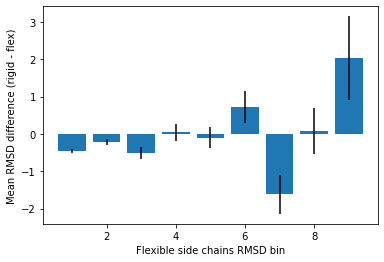

In [35]:
cuts = pd.cut(Dall[Dall.pose == 1]["target-cognate_rmsd"], range(0,10,1))
C = Dall[Dall.pose == 1].groupby([cuts])

fig, ax = plt.subplots()
ax.bar(list(range(1,10,1)),C.mean().rmsdiff.to_numpy(), yerr=C.sem().rmsdiff)
ax.set_xlabel('Flexible side chains RMSD bin')
ax.set_ylabel('Mean RMSD difference (rigid - flex)')
#plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-mean-diff-rmsd_vs_flex-rmsd-bin_hist_pose1.pdf")

Text(0, 0.5, 'Mean RMSD difference (rigid - flex)')

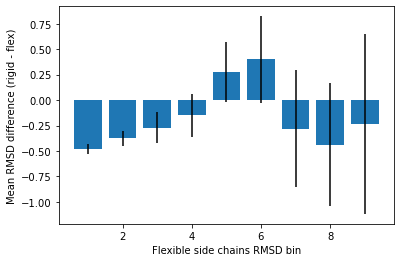

In [36]:
cuts = pd.cut(Dall[Dall.pose == 2]["target-cognate_rmsd"], range(0,10,1))
C = Dall[Dall.pose == 2].groupby([cuts])

fig, ax = plt.subplots()
ax.bar(list(range(1,10,1)),C.mean().rmsdiff.to_numpy(), yerr=C.sem().rmsdiff)
ax.set_xlabel('Flexible side chains RMSD bin')
ax.set_ylabel('Mean RMSD difference (rigid - flex)')
#plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-mean-diff-rmsd_vs_flex-rmsd-bin_hist_pose2.pdf")

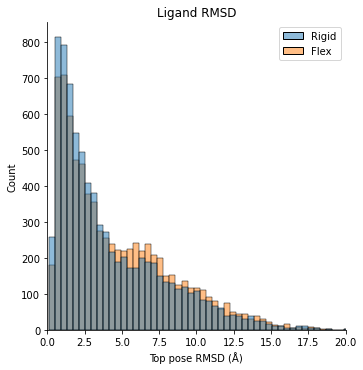

In [37]:
g = sns.displot(data=D.melt(value_vars=["rmsd", "rmsd_lig"]), x="value", hue="variable",
         facet_kws={"legend_out": False})
g._legend.set_title(None)
for t, l in zip(g._legend.texts, ["Rigid", "Flex"]): 
    t.set_text(l)
plt.xlim([0,20])
plt.xlabel("Top pose RMSD (Å)")
plt.title("Ligand RMSD")
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-rmsd_dists-LIG.pdf")

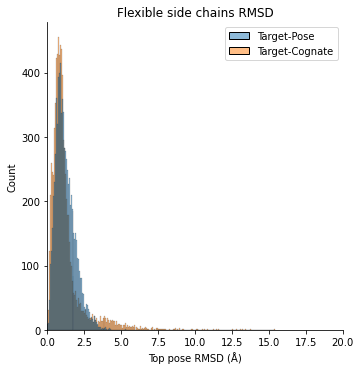

In [38]:
g = sns.displot(data=D.melt(value_vars=["target-pose_rmsd", "target-cognate_rmsd"]), x="value", hue="variable",
         facet_kws={"legend_out": False})
g._legend.set_title(None)
for t, l in zip(g._legend.texts, ["Target-Pose", "Target-Cognate"]): 
    t.set_text(l)
plt.xlim([0,20])
plt.xlabel("Top pose RMSD (Å)")
plt.title("Flexible side chains RMSD")
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-rmsd_dists-REC.pdf")